LOADING THE DATA
- Task: Load the dataset into a Pandas Dataframe.
- Library: Pandas
- Explanation: import the dataset from a CSV file and load it into a DataFrame to facilitate data Manipulation and analysis. 

In [103]:
# Importing necessary libraries to load and inspect the data
import pandas as pd

# Loading the dataset
file_path = '/mnt/data/housing_data (1).csv'
housing_data = pd.read_csv("housing_data (1).csv")

# Displaying basic information about the dataset
housing_data_info = housing_data.info()
housing_data_head = housing_data.head()

housing_data_info, housing_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None,
    Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0           0       SC60       RL           65     8450   Pave   NaN      Reg   
 1           1       SC20       RL           80     9600   Pave   NaN      Reg   
 2           2       SC60       RL           68    11250   Pave   NaN      IR1   
 3           3       SC70       RL           60     9550   Pave   NaN      IR1   
 4           4       SC60       RL           84    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
 1         Lvl    AllPub  ...        0     No    No          No       0    May   
 2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
 3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
 4         Lvl    AllPub  ...        0     No    No          No       0    Dec   
 
   Yr

- 2: Next step is Cleaning Data

In [104]:
# Checking for missing values across the dataset to identify which columns need cleaning
missing_values = housing_data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only columns with missing values

# Checking for duplicate entries
duplicates = housing_data.duplicated().sum()

missing_values, duplicates


(Alley          1369
 MasVnrType      872
 Electrical        1
 GarageYrBlt      81
 dtype: int64,
 np.int64(0))

- Electrical Column: Since there is only one missing value, we consider filling it with the most common value mode or simply removing the row
- GarageYrBlt column: this column has many missing values, likely some properties do not have a garage. we could fill these with 0 or a placeholder to represent 'no garage'

In [105]:
# Filling the missing value in 'Electrical' with the mode
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)

# Filling missing values in 'GarageYrBlt' with 0, indicating no garage
housing_data['GarageYrBlt'].fillna(0, inplace=True)

# Verifying that there are no remaining missing values
missing_values_after_cleaning = housing_data.isnull().sum().sum()

missing_values_after_cleaning


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\1671598323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\1671598323.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

np.int64(2241)

- 3: Univariate Analysis:- Where We will explore the distribution of key variables, especially 'SalePrice' to understand characteristics. i will proceed with analysis.This will show the distribution of house prices, giving you insights into the data's spread and any skewness, which is common in pricing data.

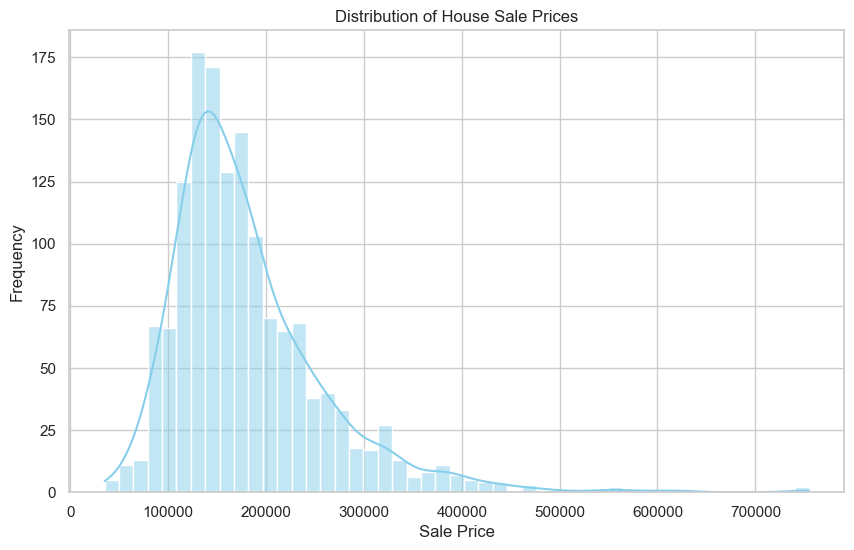

In [106]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up plot aesthetics
sns.set(style="whitegrid")

# Plotting the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


 - Univariate Analysis for Key Features
To understand the distribution of other influential variables, like LotArea, GrLivArea, YearBuilt, and OverallQual, you can plot each using similar code

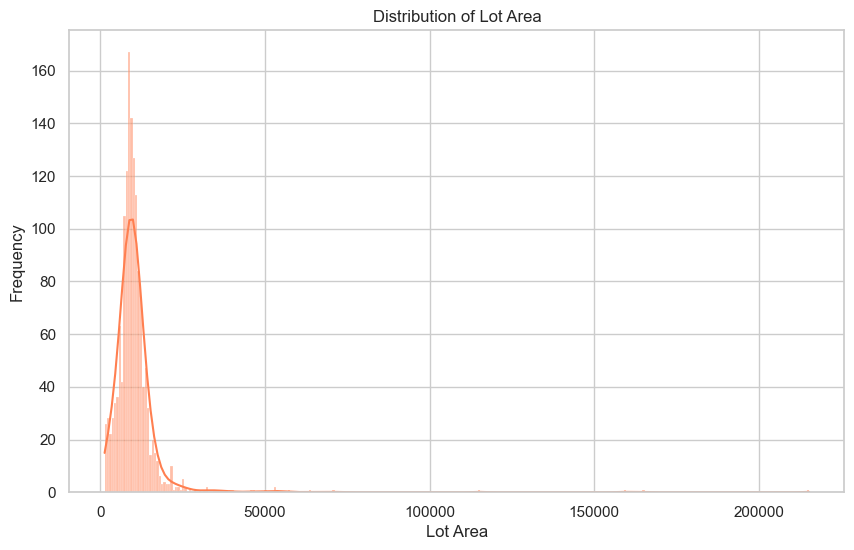

In [107]:
# Example for LotArea distribution
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['LotArea'], kde=True, color='coral')
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Frequency')
plt.show()


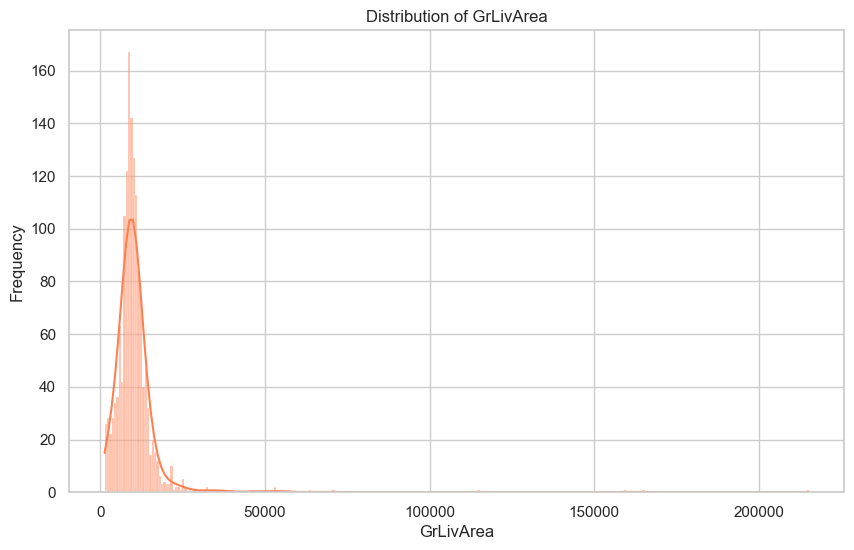

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['LotArea'], kde=True, color='coral')
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

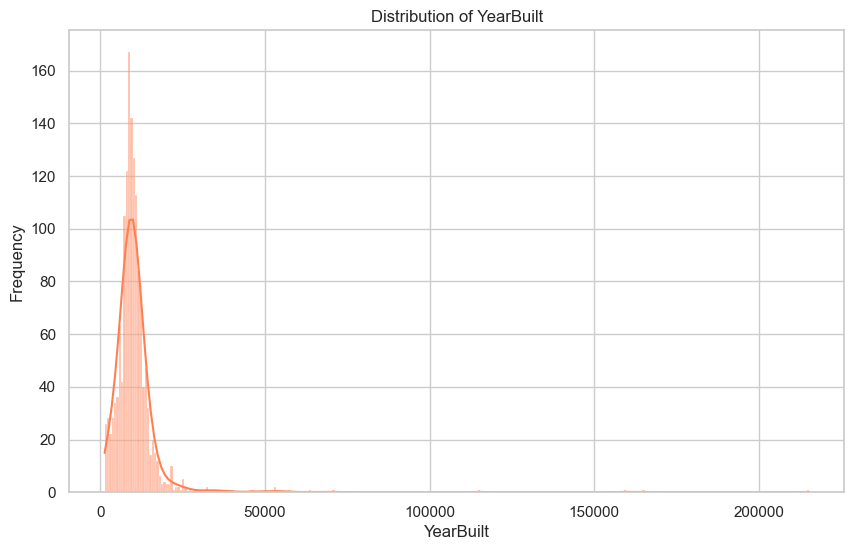

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['LotArea'], kde=True, color='coral')
plt.title('Distribution of YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
plt.show()

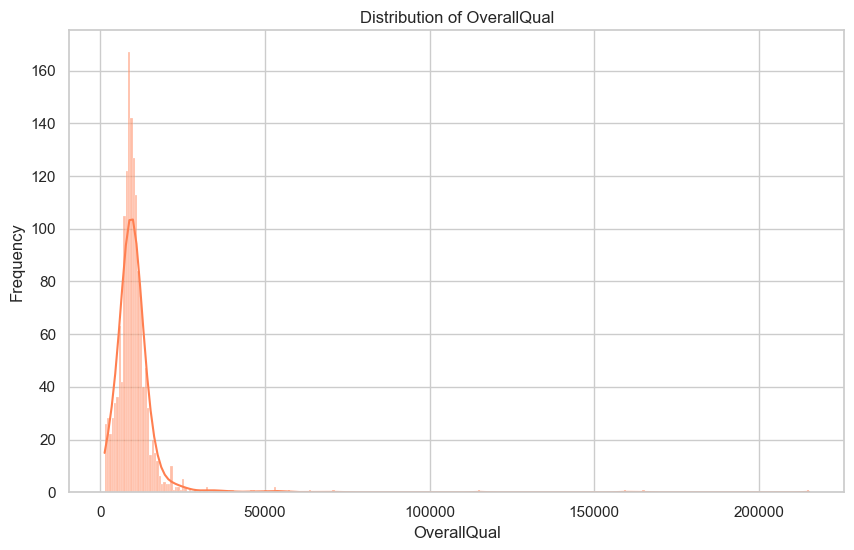

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['LotArea'], kde=True, color='coral')
plt.title('Distribution of OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Frequency')
plt.show()



- Non-Numeric Columns
- Identify any columns that contain non-numeric data.
- Convert them to numeric types where possible or exclude them from numeric analyses like correlations.

In [111]:
# Identifying non-numeric columns in the dataset
non_numeric_columns = housing_data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


- Correlation Matrix
The correlation matrix will help identify which features have the strongest linear relationships with SalePrice

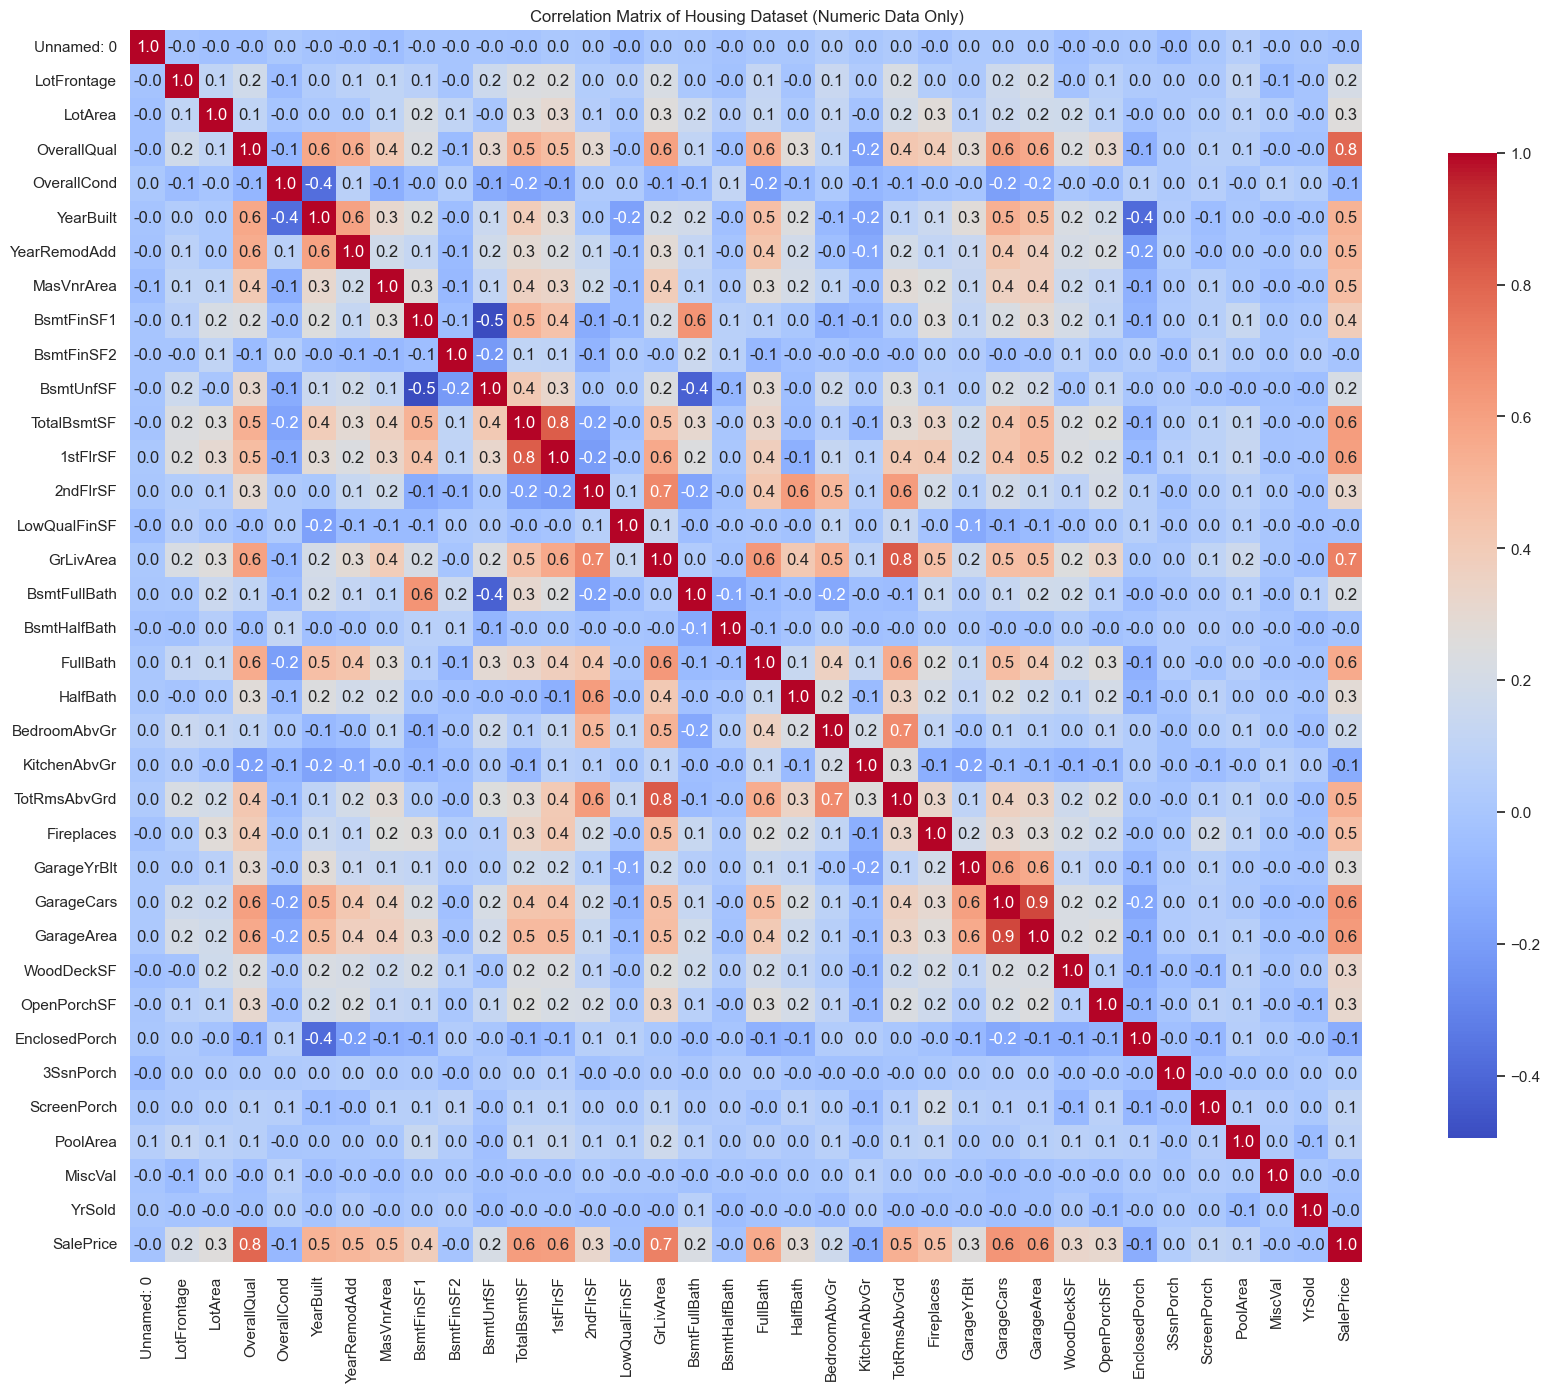

In [112]:
# Dropping non-numeric columns for correlation matrix calculation
housing_data_numeric = housing_data.drop(columns=non_numeric_columns)

# Generating the correlation matrix on numeric data only
plt.figure(figsize=(22, 16))
correlation_matrix = housing_data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Housing Dataset (Numeric Data Only)")
plt.show()


 - Scatter Plots of Key Variables Against SalePrice
. To visually explore the relationships between SalePrice and important features, you can create scatter plots for variables like GrLivArea, OverallQual,   and  GarageArea against SalePrice.
 Additional Relationships
You can similarly explore other variables, like LotArea, YearBuilt, and TotalBsmtSF, to see how they relate to SalePrice.


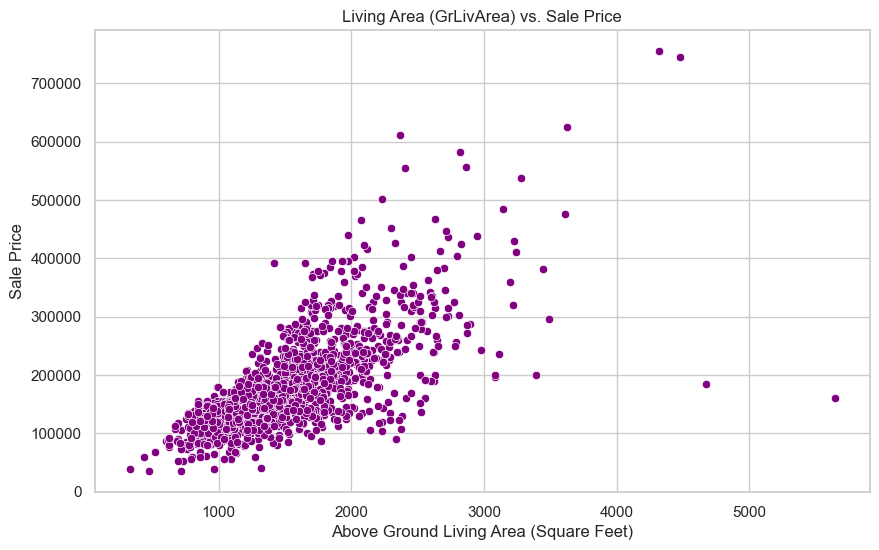

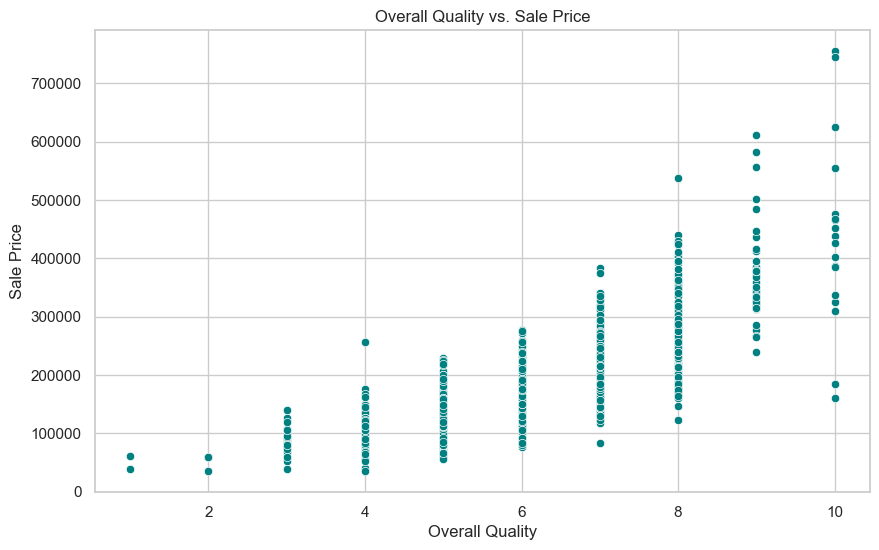

In [84]:
# Scatter plot of 'GrLivArea' vs. 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing_data, color='purple')
plt.title('Living Area (GrLivArea) vs. Sale Price')
plt.xlabel('Above Ground Living Area (Square Feet)')
plt.ylabel('Sale Price')
plt.show()

# Scatter plot of 'OverallQual' vs. 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=housing_data, color='teal')
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()


- Key Feature Engineering Ideas:
. Price per Square Foot: This gives us a normalized price metric by dividing SalePrice by the total square footage of the property.

In [85]:
# Creating a new feature for price per square foot
housing_data['PricePerSqFt'] = housing_data['SalePrice'] / housing_data['GrLivArea']


- Property Age: Calculating the age of the property from YearBuilt can show how age impacts pricing.

In [86]:
# Calculating property age based on the year the data was collected
housing_data['PropertyAge'] = 2023 - housing_data['YearBuilt']


Total Bathrooms: Summing up full and half bathrooms can provide a consolidated view of bathroom availability

In [87]:
# Summing up all types of bathrooms
housing_data['TotalBathrooms'] = housing_data['FullBath'] + (0.5 * housing_data['HalfBath'])


- Visualizing Engineered Features.
     To explore the influence of these new features on SalePrice, we can create scatter plots.
- Analyzing Feature Impact.
These visualizations will help us observe how these engineered features might affect house pricing. Once completed, we can move on to Market Trends and Historical Pricing Analysis, which would involve analyzing pricing over time if a date column is available     

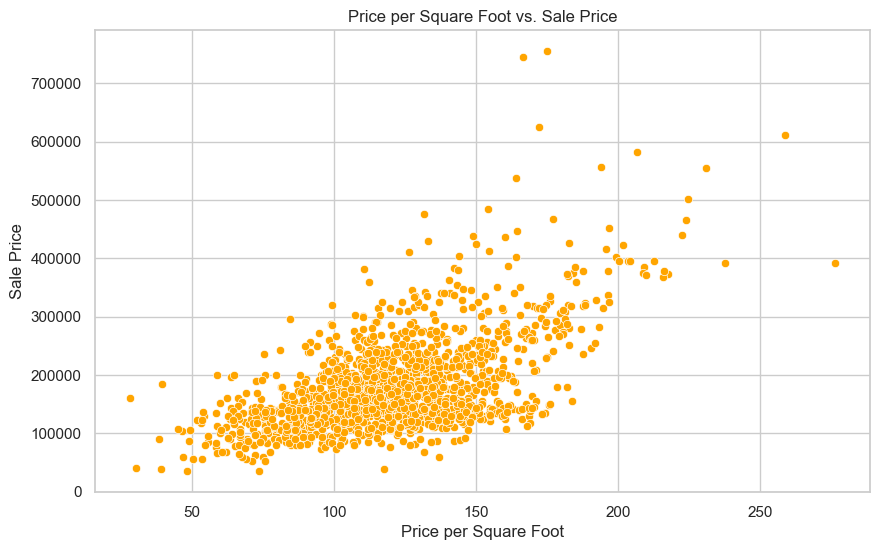

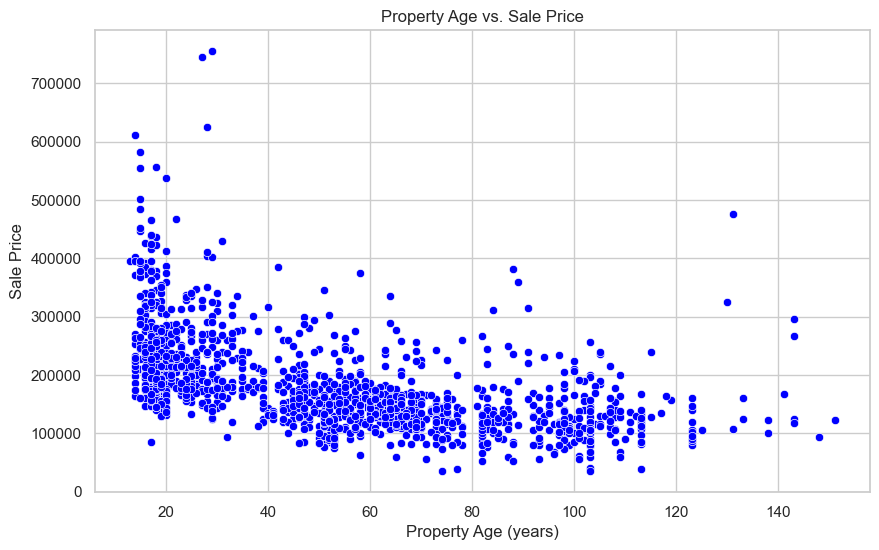

In [88]:
# Scatter plot of 'PricePerSqFt' vs. 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PricePerSqFt', y='SalePrice', data=housing_data, color='orange')
plt.title('Price per Square Foot vs. Sale Price')
plt.xlabel('Price per Square Foot')
plt.ylabel('Sale Price')
plt.show()

# Scatter plot of 'PropertyAge' vs. 'SalePrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PropertyAge', y='SalePrice', data=housing_data, color='blue')
plt.title('Property Age vs. Sale Price')
plt.xlabel('Property Age (years)')
plt.ylabel('Sale Price')
plt.show()


- Time-Based Analysis: if YearBuilt serves as a proxy for time trends.
Although we don't have explicit time-series data, we can use YearBuilt as a rough indicator to observe historical pricing trends. We’ll examine the average sale price over time to see if more recently built homes have higher average prices

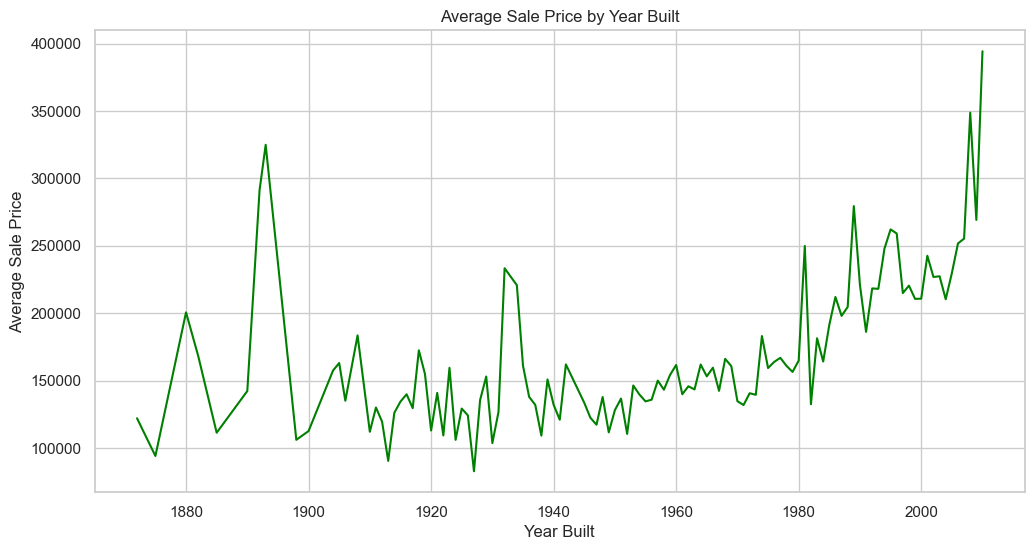

In [89]:
# Calculating average sale price by year built
avg_price_by_year = housing_data.groupby('YearBuilt')['SalePrice'].mean()

# Plotting average sale price over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, color="green")
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.show()


- : Identifying Economic or Market Trends:
If there are additional economic indicators or housing market metrics (like neighborhood pricing trends), those could be incorporated here. Without explicit economic data, we can focus on neighborhood-based trends using the Neighborhood column, if available

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11436\2560786845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neighborhood.values, y=avg_price_by_neighborhood.index, palette="viridis")


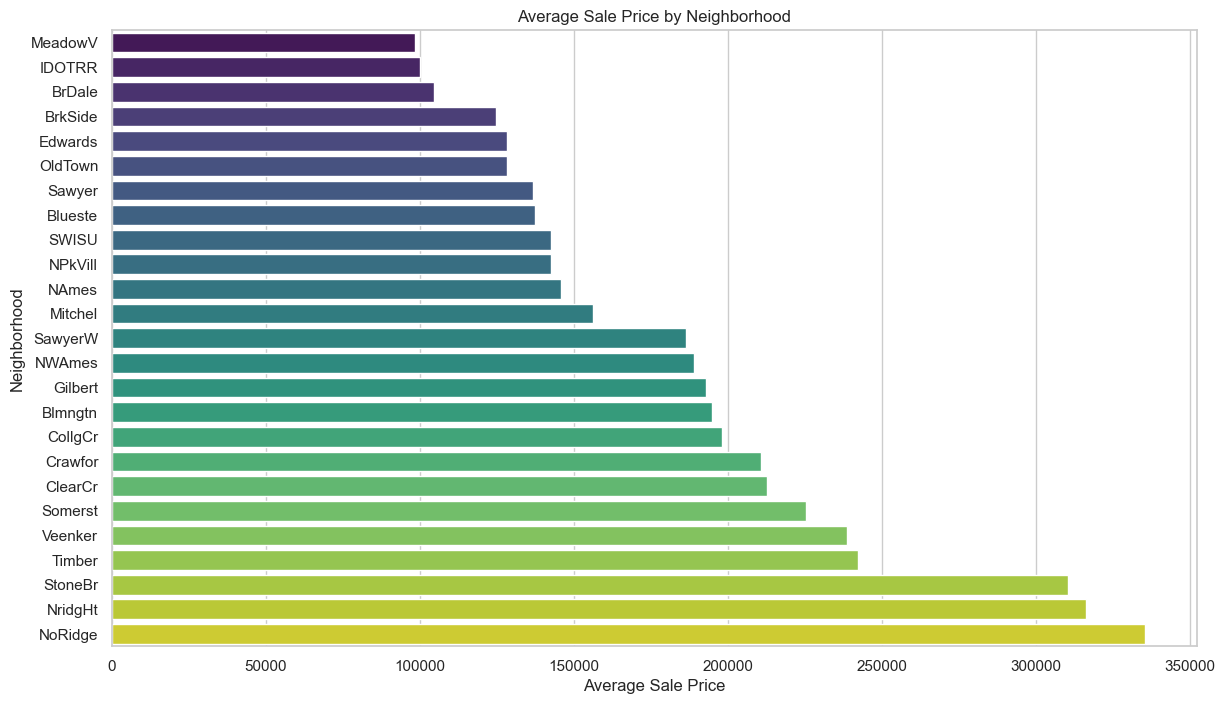

In [90]:
# Calculating average sale price by neighborhood
avg_price_by_neighborhood = housing_data.groupby('Neighborhood')['SalePrice'].mean().sort_values()

# Plotting average sale price by neighborhood
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_price_by_neighborhood.values, y=avg_price_by_neighborhood.index, palette="viridis")
plt.title('Average Sale Price by Neighborhood')
plt.xlabel('Average Sale Price')
plt.ylabel('Neighborhood')
plt.show()


- Analyzing the Impact of Key Amenities: 
Let’s start with amenities like PoolArea, GarageCars, and Fireplaces to see their relationship with SalePrice.

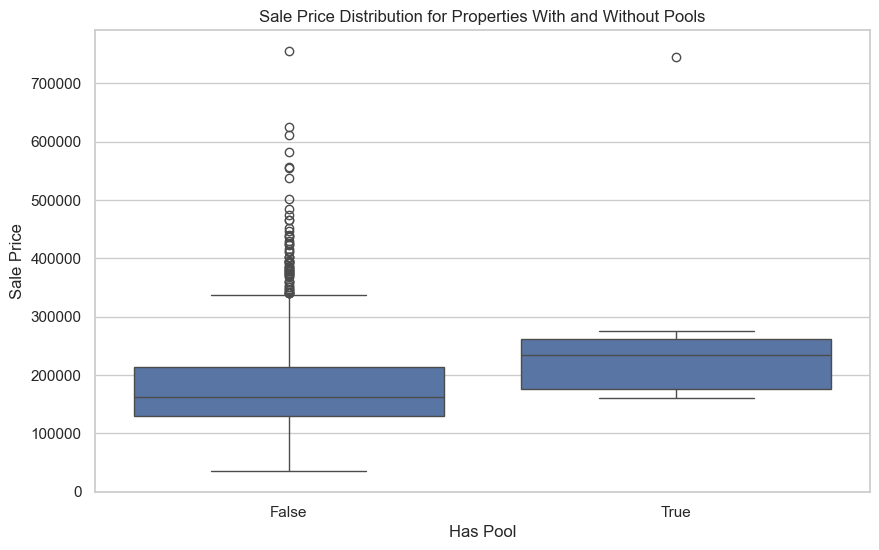

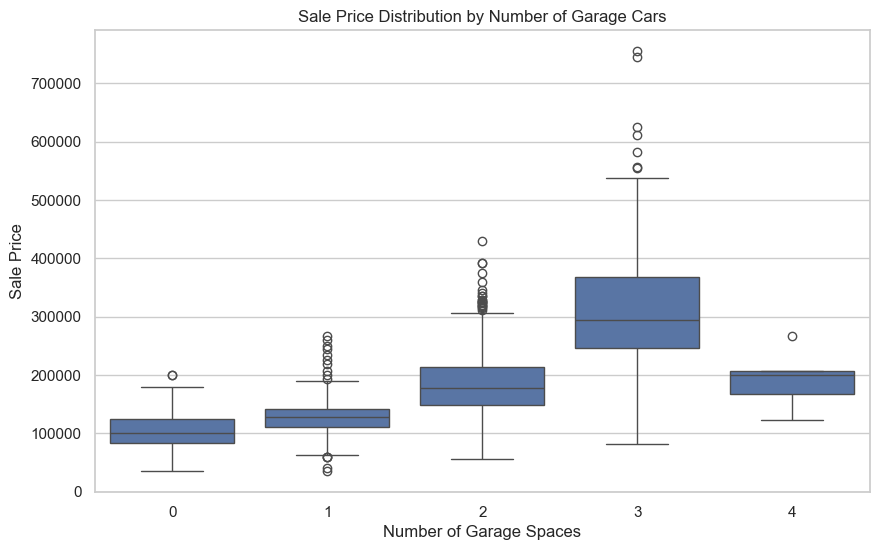

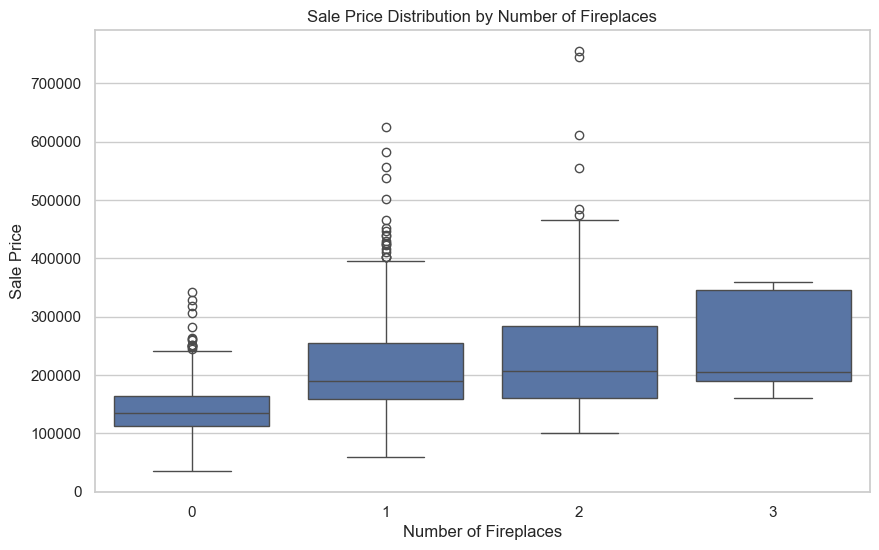

In [91]:
# Plotting SalePrice distribution based on Pool presence
plt.figure(figsize=(10, 6))
sns.boxplot(x=(housing_data['PoolArea'] > 0), y=housing_data['SalePrice'])
plt.title('Sale Price Distribution for Properties With and Without Pools')
plt.xlabel('Has Pool')
plt.ylabel('Sale Price')
plt.show()

# Plotting SalePrice distribution based on number of garages
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=housing_data)
plt.title('Sale Price Distribution by Number of Garage Cars')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Sale Price')
plt.show()

# Plotting SalePrice distribution based on the number of fireplaces
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=housing_data)
plt.title('Sale Price Distribution by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.show()


- Clustering Houses by Amenities: To identify groups of houses with similar amenities and corresponding price ranges, we can apply clustering. This will reveal distinct market segments and potentially lead to tailored pricing strategies.

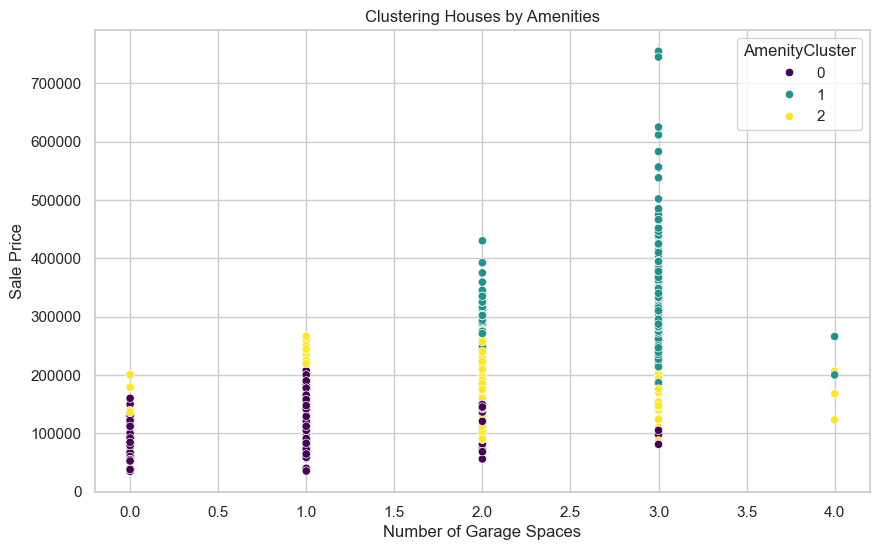

In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting relevant amenity features for clustering
amenities_data = housing_data[['SalePrice', 'PoolArea', 'GarageCars', 'Fireplaces', 'TotalBathrooms']]

# Scaling the data
scaler = StandardScaler()
amenities_scaled = scaler.fit_transform(amenities_data)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
housing_data['AmenityCluster'] = kmeans.fit_predict(amenities_scaled)

# Visualizing clusters based on SalePrice and GarageCars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageCars', y='SalePrice', hue='AmenityCluster', data=housing_data, palette='viridis')
plt.title('Clustering Houses by Amenities')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Sale Price')
plt.show()


- 1. Size and Price Per Square Foot:

Properties with higher square footage tend to command higher prices, with GrLivArea and TotalBsmtSF showing strong positive correlations with SalePrice.
The PricePerSqFt feature we created reveals how much value buyers place on each square foot of property. Higher values per square foot often indicate premium properties.

- 2. Market Trends Based on Property Age and Neighborhood:

Newer properties (lower PropertyAge) generally sell at higher prices, likely reflecting trends in construction quality, style, and buyer preferences.
Neighborhoods play a significant role in determining sale prices. Certain neighborhoods show significantly higher average prices, indicating they are more desirable or have better amenities and infrastructure.

- 3. Customer Preferences for Key Amenities:

Features like pools, multiple garage spaces, and fireplaces are associated with higher sale prices. Buyers value these amenities, and properties with more garage spaces or fireplaces generally see price increases.
Clustering analysis suggests distinct segments of properties based on their amenities, allowing for a tailored approach to different customer demographics (e.g., luxury vs. budget-conscious buyers